Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [3]:
bike_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/Stats-Model-Project/data/toronto_bike_df.csv')
yelp_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/Stats-Model-Project/data/yelp_df.csv')
fsquare_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/Stats-Model-Project/data/fsquare_df.csv')

In [4]:
bike_df
bike_df['coordinates'] = bike_df['lat'].astype(str) + ',' + bike_df['lon'].astype(str)

In [26]:
rating_df = yelp_df.merge(fsquare_df, how = 'outer')
rating_df

,name,address,yelp_rating,yelp_total_ratings,yelp_num_res,coordinates,rating,total_photos,total_ratings,num_of_res
0,Maha's,226 Greenwood Avenue,4.0,572.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN
1,The Burger's Priest,1636 Queen Street E,3.5,503.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN
2,Chino Locos Original,4 Greenwood Avenue,4.0,190.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN
3,Lahore Tikka House,1365 Gerrard Street E,3.5,542.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN
4,Gio Rana's Really Really Nice Restaurant,1220 Queen Street East,4.0,228.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
56410,Popeye's Louisiana Kitchen,645 Yonge St,NaN,NaN,NaN,"43.666874,-79.381155",6.5,17.0,11.0,50.0
56411,Pita Land,102 Gerrard St E,NaN,NaN,NaN,"43.666874,-79.381155",6.5,9.0,15.0,50.0
56412,Manulife Centre,55 Bloor St W,NaN,NaN,NaN,"43.666874,-79.381155",6.3,73.0,101.0,50.0
56413,Boston Pizza,401 Yonge St,NaN,NaN,NaN,"43.666874,-79.381155",6.3,11.0,12.0,50.0


In [24]:
complete_df = rating_df.merge(bike_df, how='outer')
complete_df.drop(['lat','lon'], axis=1, inplace=True)
complete_df.drop_duplicates(inplace=True)
complete_df

,name,address,yelp_rating,yelp_total_ratings,yelp_num_res,coordinates,rating,total_photos,total_ratings,num_of_res,num_of_bikes
0,Maha's,226 Greenwood Avenue,4.0,572.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN,19
1,The Burger's Priest,1636 Queen Street E,3.5,503.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN,19
2,Chino Locos Original,4 Greenwood Avenue,4.0,190.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN,19
3,Lahore Tikka House,1365 Gerrard Street E,3.5,542.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN,19
4,Gio Rana's Really Really Nice Restaurant,1220 Queen Street East,4.0,228.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN,19
...,...,...,...,...,...,...,...,...,...,...,...
56411,Manulife Centre,55 Bloor St W,NaN,NaN,NaN,"43.666874,-79.381155",6.3,73.0,101.0,50.0,12
56412,Boston Pizza,401 Yonge St,NaN,NaN,NaN,"43.666874,-79.381155",6.3,11.0,12.0,50.0,12
56413,Tim Hortons,581 Parliament St,NaN,NaN,NaN,"43.666874,-79.381155",6.3,2.0,1.0,50.0,12
56414,Subway,2460 Brock Rd N,NaN,NaN,NaN,"43.788319,-79.123505",NaN,0.0,0.0,1.0,23


In [46]:
complete_df.to_csv('C:/Users/John/Documents/LHL Lecture Material/Stats-Model-Project/data/complete_df.csv',index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [7]:
bikes_per_location = complete_df.groupby('coordinates').agg({'num_of_bikes': np.average, 
                                                            'name': np.size,
                                                            'yelp_total_ratings': np.count_nonzero, 
                                                            'total_ratings': np.count_nonzero,
                                                            'yelp_num_res': np.nanmean, 
                                                            'num_of_res': np.nanmean})
bikes_per_location

,num_of_bikes,name,yelp_total_ratings,total_ratings,yelp_num_res,num_of_res
coordinates,,,,,,
"43.5880774,-79.5432067",22.0,35,35,23,15.0,20.0
"43.591561,-79.545827",33.0,50,50,26,18.0,33.0
"43.5927419,-79.54033009999999",18.0,63,63,35,27.0,40.0
"43.5961692,-79.5160575",27.0,78,78,50,42.0,37.0
"43.597082,-79.522768",19.0,69,69,42,35.0,37.0
...,...,...,...,...,...,...
"43.779353,-79.193023",23.0,43,43,27,23.0,20.0
"43.77953,-79.45233",15.0,13,13,9,6.0,7.0
"43.7805505,-79.1301203",25.0,10,10,7,5.0,5.0


In [31]:
#Take the average number of restaurants between Yelp and FourSquare
bikes_per_location['average_num_res'] = (bikes_per_location['yelp_num_res'] + bikes_per_location['num_of_res']) / 2
bikes_per_location

,num_of_bikes,name,yelp_total_ratings,total_ratings,yelp_num_res,num_of_res,average_num_res
coordinates,,,,,,,
"43.5880774,-79.5432067",22.0,35,35,23,15.0,20.0,17.5
"43.591561,-79.545827",33.0,50,50,26,18.0,33.0,25.5
"43.5927419,-79.54033009999999",18.0,63,63,35,27.0,40.0,33.5
"43.5961692,-79.5160575",27.0,78,78,50,42.0,37.0,39.5
"43.597082,-79.522768",19.0,69,69,42,35.0,37.0,36.0
...,...,...,...,...,...,...,...
"43.779353,-79.193023",23.0,43,43,27,23.0,20.0,21.5
"43.77953,-79.45233",15.0,13,13,9,6.0,7.0,6.5
"43.7805505,-79.1301203",25.0,10,10,7,5.0,5.0,5.0


[Text(0.5, 0, 'number of restaurants'), Text(0, 0.5, 'number of bikes')]

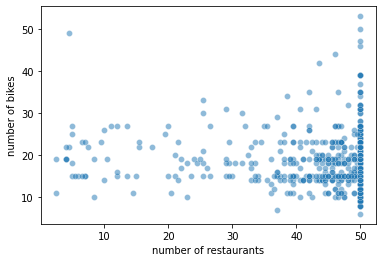

In [32]:
x = bikes_per_location['average_num_res']
y = bikes_per_location['num_of_bikes']
fig = sns.scatterplot(x=x,y=y, alpha=0.5)
fig.set(xlabel='number of restaurants', ylabel='number of bikes')
##Look for any correlation with the number of restaurants

[Text(0.5, 0, 'total yelp ratings'), Text(0, 0.5, 'number of bikes')]

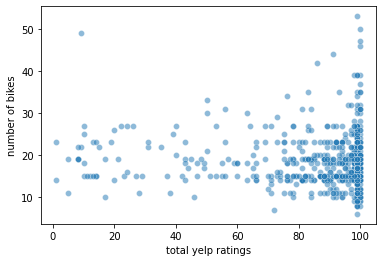

In [13]:
x = bikes_per_location['yelp_total_ratings']
y = bikes_per_location['num_of_bikes']
fig = sns.scatterplot(x=x,y=y, alpha=0.5)
fig.set(xlabel='total yelp ratings', ylabel='number of bikes')
##Look for any correlation with the total rating from yelp

[Text(0.5, 0, 'total foursquare ratings'), Text(0, 0.5, 'number of bikes')]

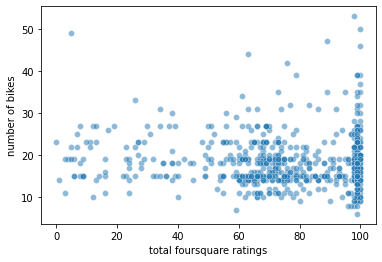

In [14]:
x = bikes_per_location['total_ratings']
y = bikes_per_location['num_of_bikes']
fig = sns.scatterplot(x=x,y=y, alpha=0.5)
fig.set(xlabel='total foursquare ratings', ylabel='number of bikes')
##Look for any correlation with the total rating from foursquare

[Text(0.5, 0, 'yelp number of restaurants'), Text(0, 0.5, 'number of bikes')]

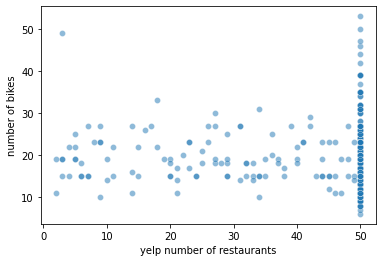

In [15]:
x = bikes_per_location['yelp_num_res']
y = bikes_per_location['num_of_bikes']
fig = sns.scatterplot(x=x,y=y, alpha=0.5)
fig.set(xlabel='yelp number of restaurants', ylabel='number of bikes')
##Look for any correlation with the number of restaurants from yelp

[Text(0.5, 0, 'foursquare number of restaurants'),
 Text(0, 0.5, 'number of bikes')]

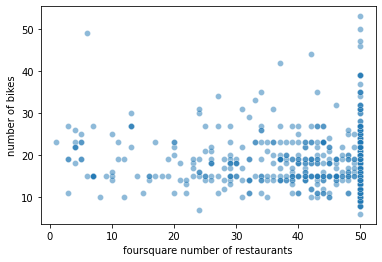

In [16]:
x = bikes_per_location['num_of_res']
y = bikes_per_location['num_of_bikes']
fig = sns.scatterplot(x=x,y=y, alpha=0.5)
fig.set(xlabel='foursquare number of restaurants', ylabel='number of bikes')
##Look for any correlation with the number of restaurants from foursquare

<AxesSubplot: xlabel='num_of_bikes', ylabel='Count'>

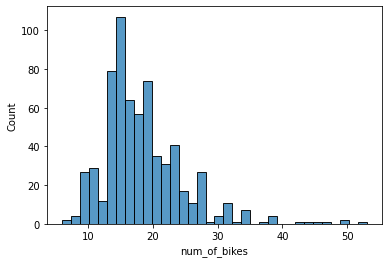

In [38]:
sns.histplot(y)

C:\Users\John\AppData\Local\Temp\ipykernel_14184\4205817679.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(complete_df.corr())


<AxesSubplot: >

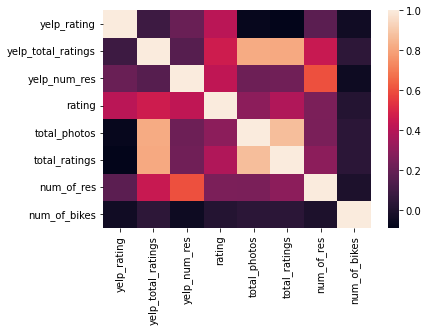

In [122]:
sns.heatmap(complete_df.corr())

<AxesSubplot: >

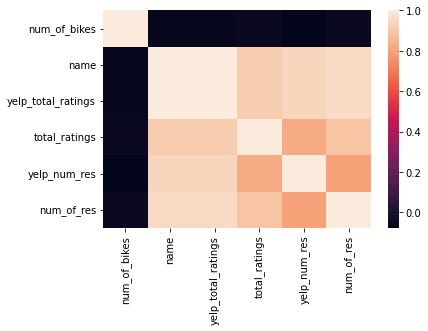

In [157]:
sns.heatmap(bikes_per_location.corr())

From these visualizations, the number of bikes did not have any correlation with the amount of restaurants or ratings. This may be due to the fact that a lot of the information had a limit of 50 restaurants which can be seen in the scatterplots above. There is a sweet spot for the number of bikes at each location which seems to be around 15. There are some potential outliers as can be seen in the histoplot of number of bikes stationed at each location. 

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [7]:
con = sqlite3.connect('C:/Users/John/Documents/LHL Lecture Material/Stats-Model-Project/data/toronto_bike_db')
# con.cursor().execute('CREATE TABLE IF NOT EXISTS toronto_bike_db (restaurant_name TEXT, restaurant_address TEXT, yelp_rating INT, yelp_total_ratings INT, yelp_number_of_restaurants INT, coordinates STR, foursquare_rating INT, foursquare_total_photos INT, foursquare_total_ratings INT, foursquare_number_of_restaurants INT, number_of_bikes INT)')
# con.commit()

In [8]:
complete_df.to_sql('toronto_bike_db', con, if_exists='replace')

56416

In [9]:
def execute_read_query(connection, query):
    cursor = con.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    return result

In [12]:
select_users = "SELECT COUNT(num_of_bikes) FROM toronto_bike_db"
test = execute_read_query(con, select_users)
for row in test:
    print(row)

(56416,)


Look at the data before and after the join to validate your data.

In [18]:
bike_df.describe()

,lat,lon,num_of_bikes
count,653.000000,653.000000,653.000000
mean,43.665997,-79.393020,18.402757
std,0.028736,0.057638,6.238741
min,43.588077,-79.545827,6.000000
25%,43.648657,-79.425000,15.000000
50%,43.660730,-79.392900,18.000000
75%,43.676590,-79.369596,21.000000
max,43.788319,-79.123505,53.000000


In [21]:
yelp_df.describe()

,yelp_rating,yelp_total_ratings,yelp_num_res
count,29857.000000,29857.000000,29857.000000
mean,3.903038,205.187494,48.424323
std,0.589884,297.509919,5.969143
min,1.000000,1.000000,2.000000
25%,3.500000,34.000000,50.000000
50%,4.000000,108.000000,50.000000
75%,4.500000,283.000000,50.000000
max,5.000000,3339.000000,50.000000


In [22]:
fsquare_df.describe()

,rating,total_photos,total_ratings,num_of_res
count,19664.000000,27212.000000,27212.000000,27212.000000
mean,7.720657,85.292077,91.909635,45.275467
std,0.917748,156.481324,141.482374,8.068018
min,4.500000,-2.000000,0.000000,1.000000
25%,7.100000,0.000000,0.000000,43.000000
50%,7.900000,24.000000,30.000000,50.000000
75%,8.400000,99.000000,119.000000,50.000000
max,9.300000,1225.000000,932.000000,50.000000


In [20]:
complete_df.describe()

,yelp_rating,yelp_total_ratings,yelp_num_res,rating,total_photos,total_ratings,num_of_res,num_of_bikes
count,29858.000000,29858.000000,29858.000000,19664.000000,27212.000000,27212.000000,27212.000000,56416.000000
mean,3.902957,205.181291,48.423371,7.720657,85.292077,91.909635,45.275467,18.310550
std,0.590038,297.506867,5.971309,0.917748,156.481324,141.482374,8.068018,6.254247
min,1.000000,1.000000,2.000000,4.500000,-2.000000,0.000000,1.000000,6.000000
25%,3.500000,34.000000,50.000000,7.100000,0.000000,0.000000,43.000000,15.000000
50%,4.000000,108.000000,50.000000,7.900000,24.000000,30.000000,50.000000,17.000000
75%,4.500000,283.000000,50.000000,8.400000,99.000000,119.000000,50.000000,21.000000
max,5.000000,3339.000000,50.000000,9.300000,1225.000000,932.000000,50.000000,53.000000


In [42]:
complete_df[complete_df['num_of_bikes']>48]

,name,address,yelp_rating,yelp_total_ratings,yelp_num_res,coordinates,rating,total_photos,total_ratings,num_of_res,num_of_bikes
4440,Miku,105-10 Bay Street,4.0,878.0,50.0,"43.640132,-79.380464",NaN,NaN,NaN,NaN,53
4441,Pai Northern Thai Kitchen,18 Duncan Street,4.5,3339.0,50.0,"43.640132,-79.380464",NaN,NaN,NaN,NaN,53
4442,Byblos,11 Duncan Street,4.5,890.0,50.0,"43.640132,-79.380464",NaN,NaN,NaN,NaN,53
4443,Canoe,66 Wellington Street W,4.0,735.0,50.0,"43.640132,-79.380464",NaN,NaN,NaN,NaN,53
4444,360 Restaurant,CN Tower,3.5,966.0,50.0,"43.640132,-79.380464",NaN,NaN,NaN,NaN,53
...,...,...,...,...,...,...,...,...,...,...,...
38180,Cabana Pool Bar,11 Polson St,NaN,NaN,NaN,"43.637764,-79.345359",7.3,298.0,95.0,6.0,49
38181,Mr J's Deli on the Beach,275 Cherry St,NaN,NaN,NaN,"43.637764,-79.345359",NaN,0.0,0.0,6.0,49
38182,The Docks,11 Polson St,NaN,NaN,NaN,"43.637764,-79.345359",NaN,0.0,0.0,6.0,49
38183,Genesis New Years Eve,11 Polson St,NaN,NaN,NaN,"43.637764,-79.345359",NaN,0.0,0.0,6.0,49


In [43]:
complete_df[complete_df['coordinates']=='43.637764,-79.345359']
##these coordinates lead to a beach which is a very popular spot for relaxation. 

,name,address,yelp_rating,yelp_total_ratings,yelp_num_res,coordinates,rating,total_photos,total_ratings,num_of_res,num_of_bikes
38176,Cherry Street Bar-B-Que,275 Cherry Street,4.0,197.0,3.0,"43.637764,-79.345359",NaN,NaN,NaN,NaN,49
38177,Island Cafe,20 Withrow Street,3.0,63.0,3.0,"43.637764,-79.345359",NaN,NaN,NaN,NaN,49
38178,Mr J's Deli On The Beach,275 Cherry Street,2.0,8.0,3.0,"43.637764,-79.345359",NaN,NaN,NaN,NaN,49
38179,Polson Pier,11 Polson St,NaN,NaN,NaN,"43.637764,-79.345359",7.4,195.0,55.0,6.0,49
38180,Cabana Pool Bar,11 Polson St,NaN,NaN,NaN,"43.637764,-79.345359",7.3,298.0,95.0,6.0,49
38181,Mr J's Deli on the Beach,275 Cherry St,NaN,NaN,NaN,"43.637764,-79.345359",NaN,0.0,0.0,6.0,49
38182,The Docks,11 Polson St,NaN,NaN,NaN,"43.637764,-79.345359",NaN,0.0,0.0,6.0,49
38183,Genesis New Years Eve,11 Polson St,NaN,NaN,NaN,"43.637764,-79.345359",NaN,0.0,0.0,6.0,49
38184,Tides Restaurant and Night Club,11 Polson St,NaN,NaN,NaN,"43.637764,-79.345359",NaN,0.0,0.0,6.0,49
